In [41]:
import pandas as pd
import numpy as np

In [42]:
data = pd.read_csv('/content/prime.csv')

In [43]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [45]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [46]:
data["director"].fillna("Unknown", inplace = True)

In [47]:
data["cast"].fillna("Unknown", inplace = True)

In [48]:
data["country"].fillna("Unknown", inplace = True)

In [49]:
data["date_added"].fillna("NA", inplace = True)

In [50]:
data['rating'].fillna("NA", inplace = True)

In [51]:
data['duration'].fillna("Unknown", inplace = True)

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

**RATING VS DIRECTOR**

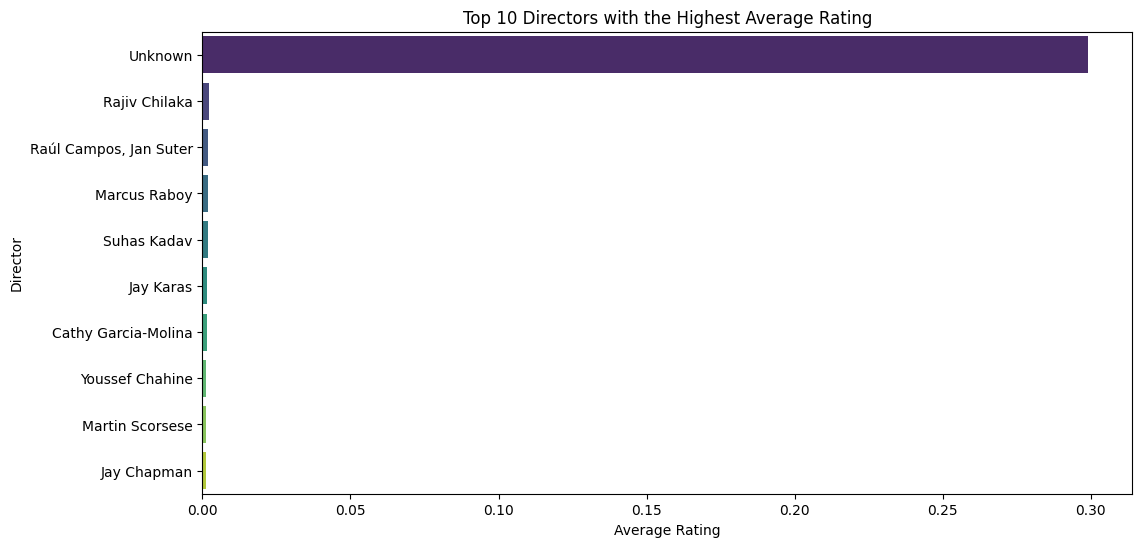

In [54]:
Adirector_ratings = data.groupby('director')['rating'].value_counts().unstack().fillna(0)
director_ratings['Average Rating'] = director_ratings.sum(axis=1) / director_ratings.sum(axis=1).sum()

director_ratings = director_ratings.sort_values(by='Average Rating', ascending=False)


top_directors = director_ratings.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors, x='Average Rating', y=top_directors.index, palette="viridis")
plt.title('Top 10 Directors with the Highest Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.show()

**Distribution of Content Types (TV Shows vs. Movies)**


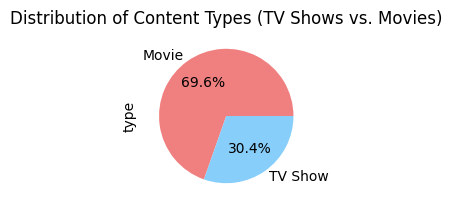

In [55]:
plt.subplot(2, 2, 2)
type_counts = data['type'].value_counts()
type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Content Types (TV Shows vs. Movies)')
plt.show()

## **TOP 3 COUNTRIES THAT WATCHES MOST TV SHOWS AND MOVIES**

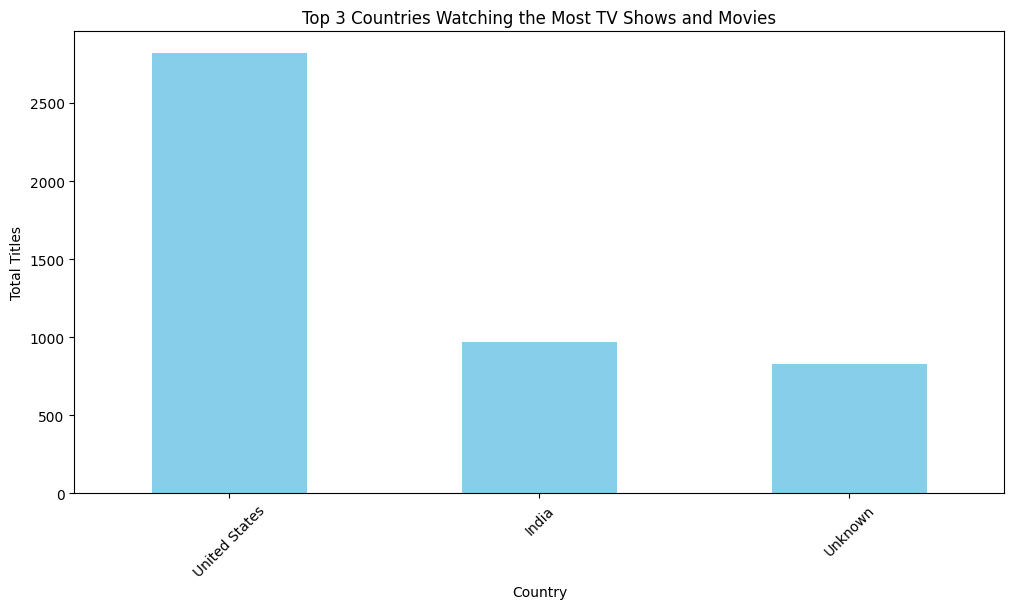

In [67]:
+country_counts = data.groupby(['country', 'type']).size().unstack(fill_value=0)
country_counts['Total'] = country_counts['TV Show'] + country_counts['Movie']
top_countries = country_counts['Total'].nlargest(3)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title(f'Top 3 Countries Watching the Most TV Shows and Movies')
plt.xlabel('Country')
plt.ylabel('Total Titles')
plt.xticks(rotation=45)
plt.show()